<a href="https://colab.research.google.com/github/KavyaNair01/Machine_Learning/blob/main/humana_decision_tree_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
for i in range(50):
  if i<10:
    tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train_agg.csv/part-0000{i}-a6808de1-d981-4148-99ee-d3a76b82da70-c000.csv')
  else:
    tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train_agg.csv/part-000{i}-a6808de1-d981-4148-99ee-d3a76b82da70-c000.csv')
  if i==0:
    df=tmp
  else:
    df=pd.concat([df,tmp],axis=0,ignore_index=True)


df.head()

,id,preventive_visit_gap_ind,cms_frailty_ind,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,atlas_recfacpth14,atlas_ffrpth14,atlas_fsrpth14,atlas_grocpth14,atlas_povertyallagespct,...,TEX_elig_cnt,TFP_elig_cnt,TRC_(MRP)_elig_cnt,TRC_(PED)_elig_cnt,HEDIS_comp_cnt,Patient_Experience_comp_cnt,Patient_Safety_comp_cnt,HEDIS_elig_cnt,Patient_Experience_elig_cnt,Patient_Safety_elig_cnt
0,1000073.0,0.0,0.0,481.53,0.00,0.142282,0.673468,1.380135,0.237137,11.6,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,4.0,NaN
1,1000096.0,0.0,0.0,1017.22,84.62,0.120904,0.785878,1.632209,0.211583,22.4,...,NaN,NaN,1.0,1.0,1.0,NaN,2.0,4.0,NaN,2.0
2,1000113.0,1.0,0.0,758.85,0.00,0.093059,0.645209,0.763084,0.155098,12.9,...,8.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,36.0,NaN
3,1000240.0,1.0,0.0,377.92,245.94,0.186335,0.745338,0.790316,0.115656,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000369.0,1.0,0.0,809.89,72.90,0.080929,0.526039,0.930684,0.222555,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0


In [4]:
df_claims2021 = pd.read_csv('/content/claims_2021.csv').drop(['Unnamed: 0', 'dos_year'], axis = 1)
df_claims2022 = pd.read_csv('/content/claims_2022.csv').drop(['Unnamed: 0', 'dos_year'], axis = 1)

In [5]:
df_agg = df.merge(df_claims2021, how='left', left_on='id', right_on='id').merge(df_claims2022, how='left', left_on='id', right_on='id')#.to_csv('/content/drive/MyDrive/humana_train_agg.csv/humana_train_agg_claims.csv')

In [ ]:
del df

In [6]:
lst3 = [x for x in df_agg.columns if x[:4]== '2021' or x[:4]== '2022']
dict_impute = dict.fromkeys(lst3, 0)
df_agg.fillna(dict_impute, inplace=True)

In [7]:
lst=list(set([x.replace('_comp_cnt', '') for x in df_agg.columns  if x[-9:]=='_comp_cnt']))
#lst
for i in lst:
  df_agg[i+'_ratio']=df_agg[i+'_comp_cnt']/df_agg[i+'_elig_cnt']

In [8]:
lst2 = [x.replace('2021_', '') for x in df_agg.columns if x[:4]== '2021']
for i in lst2:
  df_agg[i+'_ratio']=df_agg['2022_'+i]/df_agg['2021_'+i]

In [9]:
for i in [x for x in df_agg.columns if x.endswith('_ratio') and not x.startswith('rwjf')]:
  df_agg[i]=df_agg[i].fillna(0)

In [10]:
for i in [x for x in df_agg.columns if x.endswith('_ratio') and not x.startswith('rwjf')]:
  df_agg[i]=df_agg[i].replace(np.inf, 2)

In [11]:
feature_cols=list(df_agg.drop(['preventive_visit_gap_ind'],axis=1).columns)
feature_cols.remove('id')

In [12]:
donotimput=['cms_frailty_ind',
 'cms_tot_ma_payment_amt',
 'cms_tot_partd_payment_amt',
#  'atlas_recfacpth14',
#  'atlas_ffrpth14',
#  'atlas_fsrpth14',
#  'atlas_grocpth14',
#  'atlas_povertyallagespct',
 'cci_score',
 'fci_score',
 'dcsi_score', 'dual_eligible_ind',
 'disabled_ind',
 'lis_ind',
 'tenure_band_index',
 'generic_grouper',
 'unattributed_provider',
 'age',
 'veteran_ind',
 'pbp_segment_id',
 'sex_cd_index',
 'region_index','days_since_last_clm','lang_spoken_cd',
 'rucc_category',
 'riskarr_downside',
 'riskarr_upside',
 'riskarr_rewards',
 'riskarr_global','channelIndex', 'consec_tenure_month',
 'all_mm_tenure',
 'dual_eligible_ind',
 'disabled_ind',
 'lis_ind',
 'tenure_band_index',
 'generic_grouper',
 'unattributed_provider',
 'age',
 'veteran_ind',
 'pbp_segment_id',
 'sex_cd_index',
 'region_index',
 'race_index', 'nonpar_deduct_pmpm_cost',
 'oontwk_deduct_pmpm_cost',
 'total_deduct_pmpm_cost',
 'rx_overall_deduct_pmpm_cost','id',
 'preventive_visit_gap_ind',
 'days_since_last_login'
 ]
print(donotimput)

['cms_frailty_ind', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'cci_score', 'fci_score', 'dcsi_score', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'days_since_last_clm', 'lang_spoken_cd', 'rucc_category', 'riskarr_downside', 'riskarr_upside', 'riskarr_rewards', 'riskarr_global', 'channelIndex', 'consec_tenure_month', 'all_mm_tenure', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'race_index', 'nonpar_deduct_pmpm_cost', 'oontwk_deduct_pmpm_cost', 'total_deduct_pmpm_cost', 'rx_overall_deduct_pmpm_cost', 'id', 'preventive_visit_gap_ind', 'days_since_last_login']


In [14]:
imput_dict=dict()
for x in [x for x in df_agg.columns if x not in donotimput] :
  if x.startswith('cnt_cp') or x.startswith('nonpar') or x.startswith('oontwk') or x.startswith('total') or x.startswith('bh_rtc') or x.startswith('bh_psyc') or x.startswith('rx') or x.startswith('login') or x.startswith('2021') or x.startswith('2022') or x[-3:] =='cnt'  or x in [ 'Cancers',
 'Cardiovascular_Diseases',
 'Diabetes_Related',
 'Immunological_Disorders',
 'Kidney_and_Liver_Diseases',
 'Mental_Health_Disorders',
 'Miscellaneous',
 'Neurological_Disorders',
 'Respiratory_Diseases',
 'other'] or x in ['annual_wellness',
 'clm_unique_key',
 'podiatrist_visit',
 'pcp_visit',
 'fqhc_visit',
 'cardiologist_visit',
 'telehealth',
 'urgent_care_visit',
 'gastroenterologist_visit',
 'oncolologist_visit',
 'pulmonologist_visit',
 'preventative_visit',
 'nephroloogist_visit',
 'orthopedist_visit',
 'ophthalmologist_visit',
 'humana_paf',
 'optometrist_visit',
 'ihwa',
 'endocrinologist_visit',
 'radiologist_visit',
 'physical_therapist_visit',
 'comp_physical_exam',
 'er_visit',
 'obgyn_visit']:
    imput_dict[x]= 0


In [15]:
df_agg.fillna(imput_dict, inplace=True)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(df_agg[feature_cols],df_agg['preventive_visit_gap_ind'])

DecisionTreeClassifier(max_depth=5)

In [43]:
feat_cols=pd.DataFrame({'feature':feature_cols,'importance':dtc.feature_importances_}).sort_values('importance',ascending=False).loc[lambda x:x['importance']>0]

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc2=DecisionTreeClassifier(max_depth=5)
dtc2.fit(df_agg[feat_cols['feature']],df_agg['preventive_visit_gap_ind'])

DecisionTreeClassifier(max_depth=5)

In [35]:
from sklearn.tree import export_graphviz
dot_data=export_graphviz(dtc,feature_names=feature_cols,filled=True,rounded=True)

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [33]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00


In [37]:
df_agg['preventive_visit_gap_ind'].value_counts()

,count
preventive_visit_gap_ind,
0.0,840844
1.0,687060


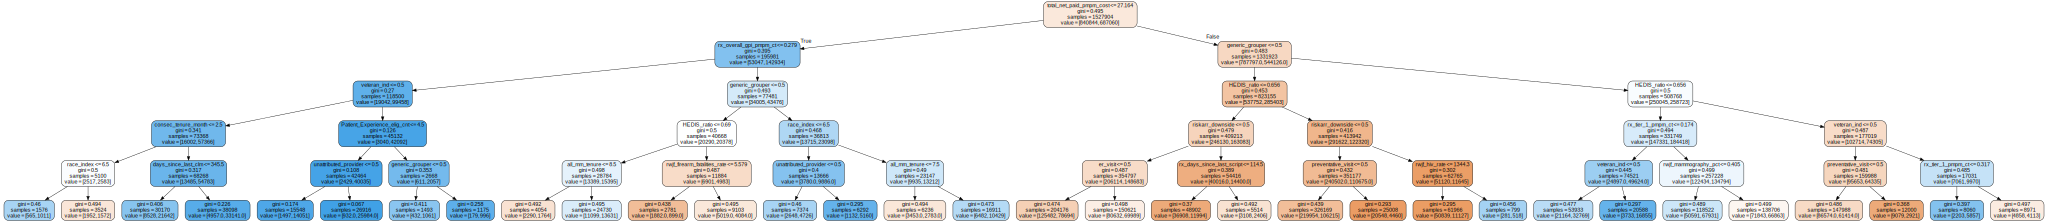

In [36]:
import graphviz
graph = graphviz.Source(dot_data, format="png")
graph

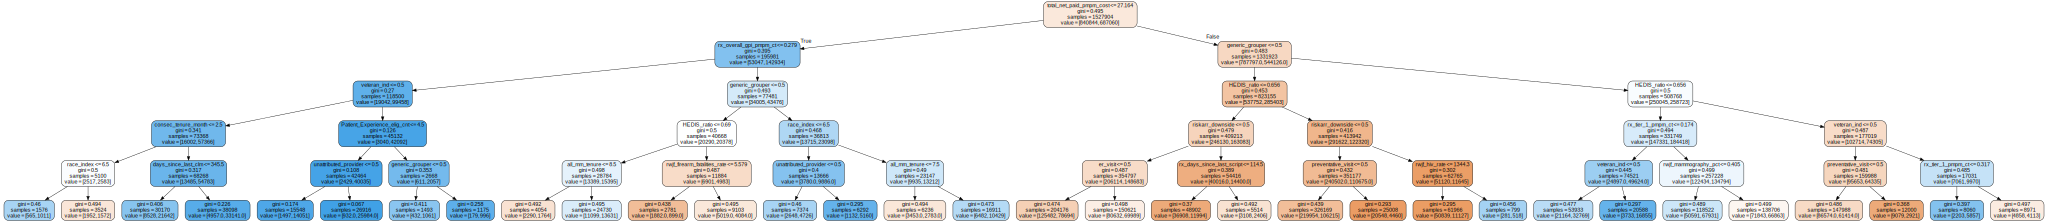

In [45]:
dot_data=export_graphviz(dtc,feature_names=feature_cols,filled=True,rounded=True)
graph = graphviz.Source(dot_data, format="png")
graph